# Run a 1D Loop

In [1]:
import qcodes as qc

from qcodes.tests.instrument_mocks import DummyInstrument
from qcodes.instrument.parameter import Parameter
from qcodes.instrument.specialized_parameters import ElapsedTimeParameter
from qcodes.loops import Loop

In [2]:
src1 = DummyInstrument(name='src1', gates=['v1', 'v2'])

In [3]:
t = ElapsedTimeParameter('t')
V_appl = Parameter('V', label='V_appl', unit='V', get_cmd=src1.v1.get, set_cmd=src1.v1.set)
I_meas = Parameter('I', label='I_meas', unit='A', get_cmd=lambda: float(src1.v1()/1000))

In [8]:
t.reset_clock()
loop = Loop(V_appl.sweep(-1,1,0.01), delay = 0.01).each(V_appl,I_meas,t)

In [9]:
loop.run()

Started at 2020-05-12 17:09:27
DataSet:
   location = 'data/2020-05-12/#032_{name}_17-09-27'
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | V_set      | V            | (201,)
   Measured | V          | V            | (201,)
   Measured | I          | I            | (201,)
   Measured | t          | t            | (201,)
Finished at 2020-05-12 17:09:29


DataSet:
   location = 'data/2020-05-12/#032_{name}_17-09-27'
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | V_set      | V            | (201,)
   Measured | V          | V            | (201,)
   Measured | I          | I            | (201,)
   Measured | t          | t            | (201,)

# Plotting Loop Data

In [6]:
%matplotlib inline
from qcodes.plots.pyqtgraph import QtPlot

loop = Loop(V_appl.sweep(-1,1,0.01), delay = 0.01).each(V_appl,I_meas,t)
data = loop.get_data_set(name='sweep')
plot = QtPlot()
plot.add(data.I)
loop.run()
plot.update()

Started at 2020-05-12 17:23:36
DataSet:
   location = 'data/2020-05-12/#036_sweep_17-23-34'
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | V_set      | V            | (201,)
   Measured | V          | V            | (201,)
   Measured | I          | I            | (201,)
   Measured | t          | t            | (201,)
Finished at 2020-05-12 17:23:38


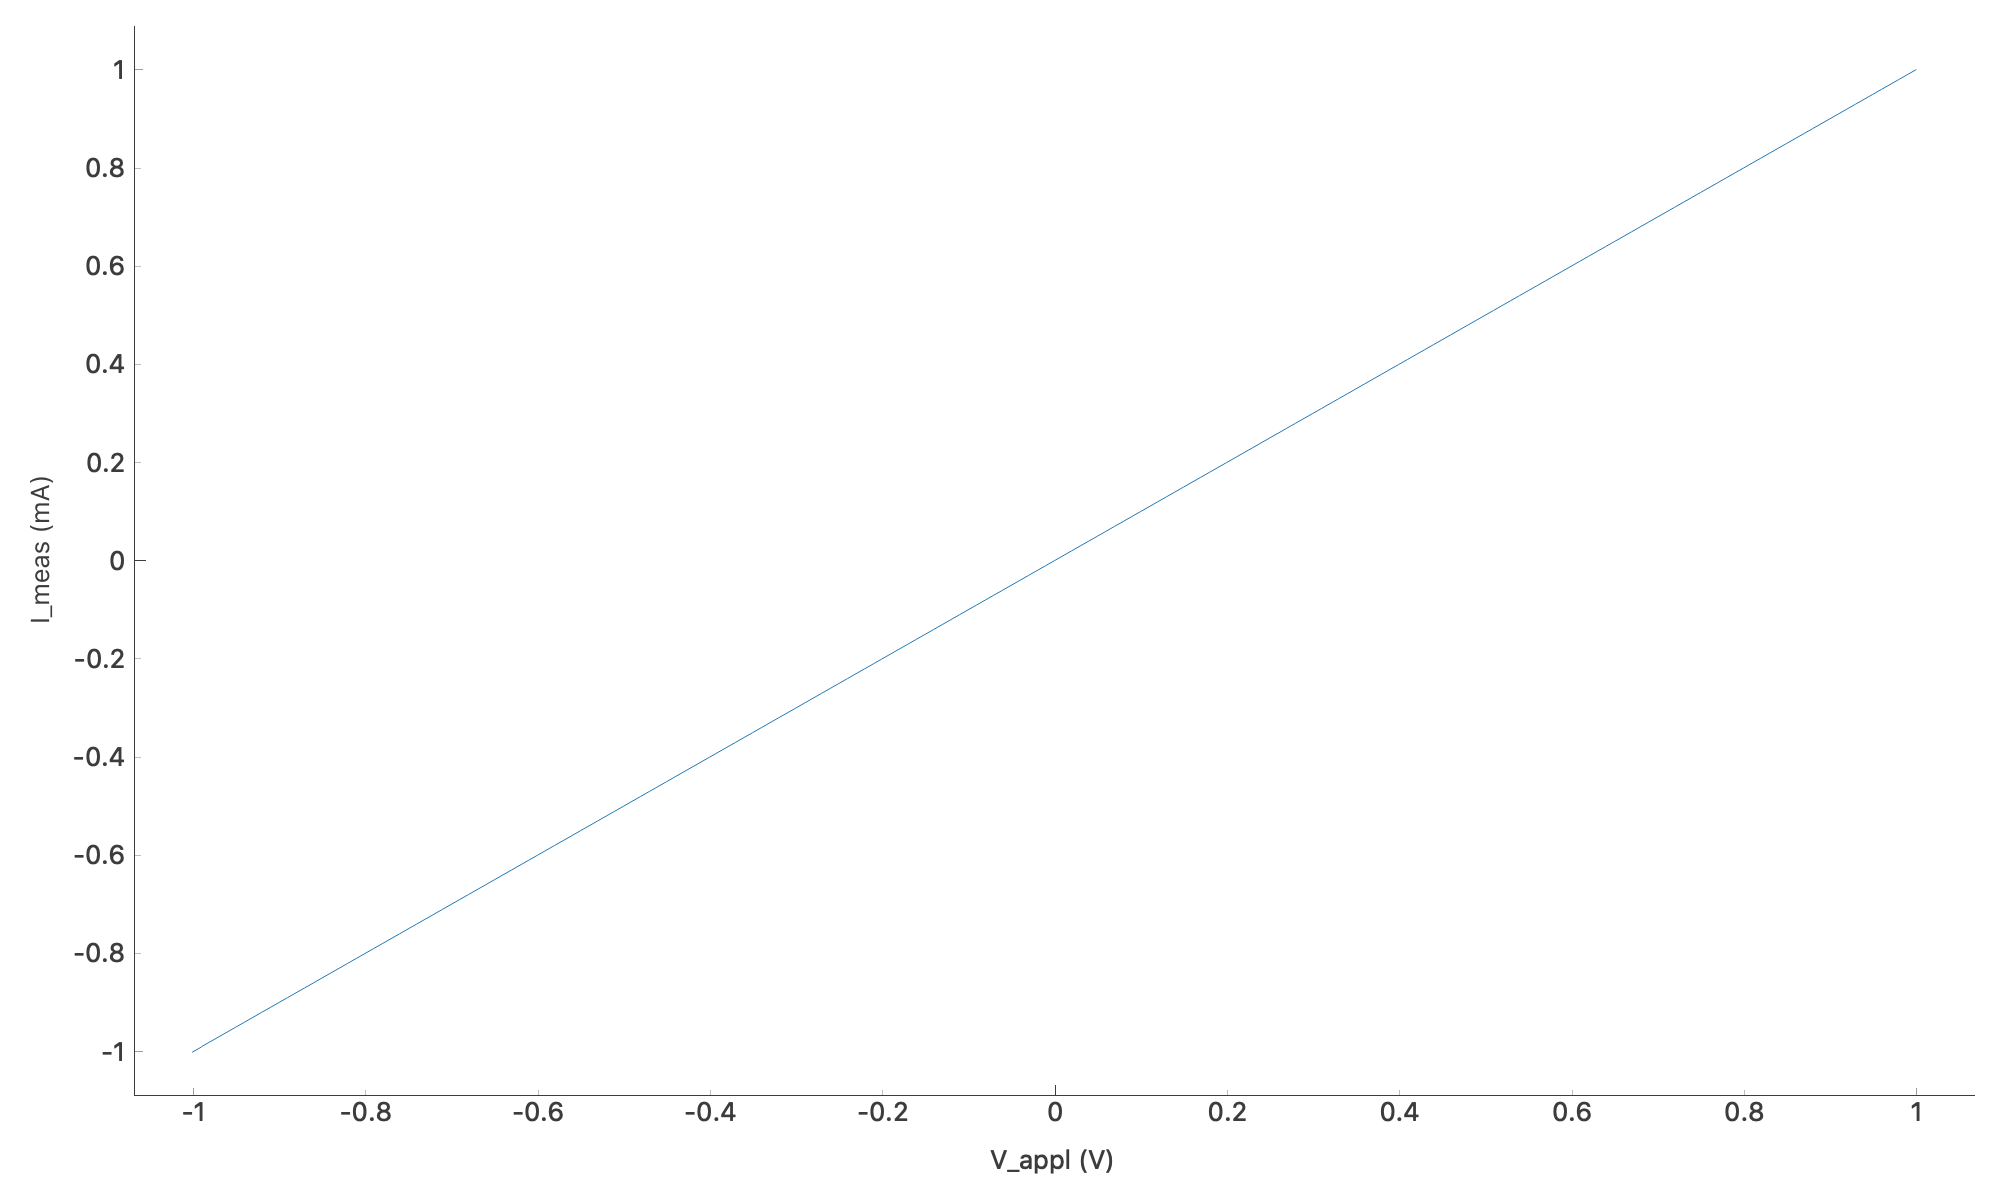

In [7]:
plot

In [8]:
loop = Loop(V_appl.sweep(-1,1,0.01), delay = 0.1).each(V_appl,I_meas,t)
data = loop.get_data_set(name='sweep')
plot = QtPlot()
plot.add(data.I)
_ = loop.with_bg_task(plot.update).run()

Started at 2020-05-12 17:27:26
DataSet:
   location = 'data/2020-05-12/#037_sweep_17-27-25'
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | V_set      | V            | (201,)
   Measured | V          | V            | (201,)
   Measured | I          | I            | (201,)
   Measured | t          | t            | (201,)
Finished at 2020-05-12 17:27:51


# Storing Data in a Database

In [24]:
from qcodes import initialise_database, load_or_create_experiment
from qcodes.data.location import FormatLocation
from qcodes.dataset.legacy_import import import_dat_file
from qcodes.data.io import DiskIO

exp_name = 'DC-IV-Sweep'
sample_name = 'Test-Resistor'

qc.config["core"]["db_location"]='./experiments.db'
initialise_database()
exp=load_or_create_experiment(exp_name,sample_name)

In [25]:
loop = Loop(V_appl.sweep(-1,1,0.01), delay = 0.001).each(V_appl,I_meas,t)

In [26]:
loc_fmt='./data/{date}/#{counter}_{name}_{sample}'
rcd={'name':exp_name, 'sample': sample_name}
loc_provider = FormatLocation(fmt=loc_fmt)
loc = loc_provider(DiskIO("."),record=rcd)
data = loop.get_data_set(location=loc)

In [27]:
loop.run()

Started at 2020-05-12 17:48:00
DataSet:
   location = './data/2020-05-12/#003_DC-IV-Sweep_Test-Resistor'
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | V_set      | V            | (201,)
   Measured | V          | V            | (201,)
   Measured | I          | I            | (201,)
   Measured | t          | t            | (201,)
Finished at 2020-05-12 17:48:01


DataSet:
   location = './data/2020-05-12/#003_DC-IV-Sweep_Test-Resistor'
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | V_set      | V            | (201,)
   Measured | V          | V            | (201,)
   Measured | I          | I            | (201,)
   Measured | t          | t            | (201,)

In [28]:
import_dat_file(loc,exp)

Starting experimental run with id: 2. 


[2, 2, 2]

In [29]:
load_or_create_experiment(exp_name,sample_name)

DC-IV-Sweep#Test-Resistor#1@/Users/jonaskolzer/Documents/Quantacademy/Tutorial_Code/experiments.db
--------------------------------------------------------------------------------------------------
1-results-1-V_set,I,V,t-603
2-results-2-V_set,I,V,t-603